In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from collections import defaultdict
import torch
from pyrocov import mutrans
import pickle

In [3]:
results_dir = 'results/'
features = torch.load(results_dir + 'features.3000.1.pt', map_location=torch.device('cpu'))
clades = features['clades']
clade_to_lineage = features['clade_to_lineage']
features = features['aa_features']
print(features.shape)

torch.Size([3000, 2904])


## examine omicron

In [4]:
lineage_to_clade = defaultdict(list)

for k, v in clade_to_lineage.items():
    lineage_to_clade[v].append(k)

In [5]:
ba2 = np.array([0 if clade not in lineage_to_clade['BA.2'] else 1 for clade in clades], dtype=bool)
features_ba2 = features.data.numpy()[ba2][0]

In [6]:
data = torch.load('results/mutrans.data.single.3000.1.50.None.pt', map_location='cpu')
weekly_clades = data['weekly_clades']
feature_counts = weekly_clades.sum(1).data.numpy() @ features.data.numpy()
ba2_feature_counts = feature_counts[:, np.array(features_ba2, dtype=bool)]
ba2_feature_counts.shape

(56, 49)

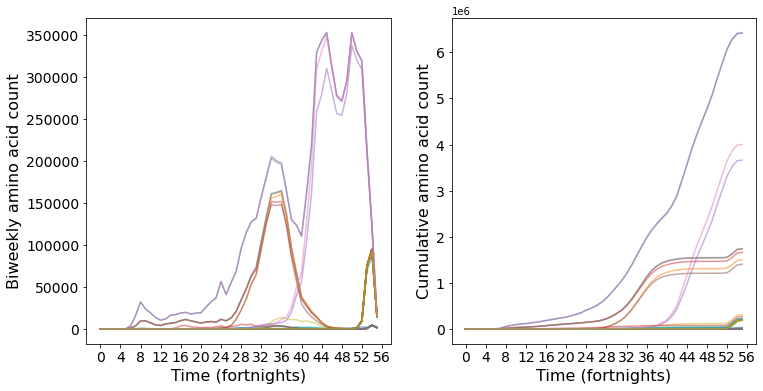

In [7]:
fig, axes = plt.subplots(1, 2, sharey=False, figsize=(12, 6))

for ax in axes:
    feats = ba2_feature_counts.T if ax == axes[0] else np.cumsum(ba2_feature_counts, axis=0).T
    if ax == axes[0]:
        ax.set_ylabel("Biweekly amino acid count", fontsize=16)
    else:
        ax.set_ylabel("Cumulative amino acid count", fontsize=16)
    for feat in feats:
        ax.plot(np.arange(56), feat, alpha=0.5)
    ax.set_xlabel("Time (fortnights)", fontsize=16)
    ax.set_xticks(np.arange(0, 60, 4))
    ax.tick_params(axis='both', which='major', labelsize=14)

In [8]:
cs = np.cumsum(ba2_feature_counts, axis=0).T
np.sort(cs[:, 48])

array([1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
       1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
       3.100000e+01, 3.700000e+01, 3.700000e+01, 3.700000e+01,
       3.700000e+01, 3.700000e+01, 3.800000e+01, 3.800000e+01,
       3.800000e+01, 3.800000e+01, 3.800000e+01, 3.800000e+01,
       3.800000e+01, 4.500000e+01, 5.600000e+01, 1.140000e+02,
       2.470000e+02, 2.850000e+02, 3.310000e+02, 5.300000e+02,
       5.580000e+02, 1.034000e+03, 1.461000e+03, 2.222000e+03,
       2.851000e+03, 8.980000e+03, 1.619600e+04, 2.889400e+04,
       2.889400e+04, 4.518500e+04, 7.648400e+04, 1.177370e+05,
       1.208796e+06, 1.309019e+06, 1.465483e+06, 1.541170e+06,
       1.547285e+06, 2.070547e+06, 2.359858e+06, 4.767256e+06,
       4.781914e+06], dtype=float32)

In [98]:
#fits = [(682, 1.4591528177261353, 1.444701476637274, 1.4736041588149964, [38.0, 247.0, 38.0, 1465342.0, 28870.0, 1541029.0, 483.0, 1547144.0, 1.0, 114.0, 31.0, 38.0, 1.0, 1.0, 2021705.0, 1.0, 38.0, 4715280.0, 285.0, 505.0, 16116.0, 2851.0, 28870.0, 1.0, 4729937.0, 1460.0, 56.0, 38.0, 117675.0, 45162.0, 8980.0, 1308864.0, 2218.0, 331.0, 38.0, 1208696.0, 37.0, 37.0, 38.0, 1.0, 1.0, 37.0, 37.0, 76484.0, 1034.0, 1.0, 2308076.0, 45.0, 37.0]), (696, 1.4352014064788818, 1.4219409275613726, 1.448461885396391, [40.0, 249.0, 40.0, 1465795.0, 28974.0, 1541483.0, 645.0, 1547598.0, 1.0, 114.0, 31.0, 40.0, 1.0, 1.0, 2292899.0, 1.0, 40.0, 5002117.0, 285.0, 838.0, 16748.0, 2851.0, 28974.0, 1.0, 5016786.0, 1471.0, 58.0, 40.0, 117916.0, 45305.0, 8983.0, 1309363.0, 2239.0, 333.0, 40.0, 1208993.0, 39.0, 39.0, 40.0, 1.0, 1.0, 38.0, 38.0, 76487.0, 1034.0, 1.0, 2594243.0, 45.0, 39.0]), (710, 1.5707656145095825, 1.5554748330265284, 1.5860563959926366, [85.0, 294.0, 85.0, 1466075.0, 29107.0, 1541765.0, 1059.0, 1547880.0, 2.0, 115.0, 32.0, 85.0, 2.0, 2.0, 2622872.0, 2.0, 85.0, 5347458.0, 286.0, 1214.0, 17872.0, 2852.0, 29107.0, 2.0, 5362138.0, 1537.0, 102.0, 85.0, 118084.0, 45481.0, 9029.0, 1309717.0, 2296.0, 378.0, 85.0, 1209250.0, 83.0, 83.0, 85.0, 2.0, 2.0, 81.0, 81.0, 76537.0, 1035.0, 2.0, 2939068.0, 46.0, 83.0]), (724, 2.2143023014068604, 2.177364456132054, 2.2512401466816665, [684.0, 893.0, 684.0, 1466785.0, 29757.0, 1542481.0, 1657.0, 1548596.0, 7.0, 116.0, 33.0, 684.0, 7.0, 7.0, 2949124.0, 3.0, 684.0, 5684679.0, 287.0, 1487.0, 19346.0, 2853.0, 29757.0, 7.0, 5699404.0, 2156.0, 698.0, 684.0, 118741.0, 46213.0, 9622.0, 1310501.0, 2906.0, 977.0, 684.0, 1209992.0, 679.0, 673.0, 684.0, 3.0, 7.0, 655.0, 655.0, 77137.0, 1036.0, 3.0, 3275946.0, 47.0, 679.0]), (738, 2.9016971588134766, 2.875913279764354, 2.927481037862599, [7250.0, 7459.0, 7250.0, 1473424.0, 36381.0, 1549126.0, 2339.0, 1555241.0, 47.0, 131.0, 48.0, 7250.0, 47.0, 47.0, 3268786.0, 18.0, 7250.0, 6014483.0, 302.0, 1715.0, 21805.0, 2868.0, 36381.0, 47.0, 6029275.0, 8737.0, 7152.0, 7250.0, 125339.0, 52378.0, 16038.0, 1317171.0, 9492.0, 7525.0, 7250.0, 1216804.0, 7133.0, 7068.0, 7250.0, 18.0, 47.0, 7032.0, 7032.0, 83704.0, 1051.0, 18.0, 3605293.0, 62.0, 7133.0]), (752, 4.286563873291016, 4.20405312821269, 4.369074618369341, [70778.0, 70987.0, 70778.0, 1536994.0, 99928.0, 1612701.0, 2986.0, 1618816.0, 490.0, 560.0, 477.0, 70779.0, 490.0, 490.0, 3498942.0, 447.0, 70778.0, 6250388.0, 731.0, 2375.0, 23802.0, 3297.0, 99928.0, 490.0, 6265248.0, 72274.0, 69502.0, 70777.0, 188875.0, 110182.0, 76815.0, 1378853.0, 73021.0, 70692.0, 70779.0, 1280454.0, 69483.0, 68619.0, 70778.0, 447.0, 490.0, 69635.0, 69635.0, 147236.0, 1483.0, 447.0, 3839836.0, 494.0, 69483.0]), (766, 7.143059253692627, 6.898830226361752, 7.387288281023502, [167615.0, 167802.0, 167593.0, 1633883.0, 196767.0, 1709591.0, 6322.0, 1715706.0, 3803.0, 3853.0, 3770.0, 167621.0, 3803.0, 3803.0, 3633366.0, 3740.0, 167591.0, 6386171.0, 4024.0, 5687.0, 27552.0, 6590.0, 196767.0, 3803.0, 6401019.0, 169095.0, 164231.0, 167603.0, 285702.0, 198195.0, 169791.0, 1472334.0, 169842.0, 166514.0, 167621.0, 1377319.0, 164210.0, 162053.0, 167610.0, 3740.0, 3805.0, 164505.0, 164505.0, 244049.0, 4782.0, 3740.0, 3973423.0, 3793.0, 164212.0])]
fits = [(710, 1.5707708597183228, 1.5554789720475675, 1.586062747389078, [85.0, 294.0, 85.0, 1466075.0, 29107.0, 1541765.0, 1059.0, 1547880.0, 2.0, 115.0, 32.0, 85.0, 2.0, 2.0, 2622872.0, 2.0, 85.0, 5347458.0, 286.0, 1214.0, 17872.0, 2852.0, 29107.0, 2.0, 5362138.0, 1537.0, 102.0, 85.0, 118084.0, 45481.0, 9029.0, 1309717.0, 2296.0, 378.0, 85.0, 1209250.0, 83.0, 83.0, 85.0, 2.0, 2.0, 81.0, 81.0, 76537.0, 1035.0, 2.0, 2939068.0, 46.0, 83.0]), (717, 1.8419551849365234, 1.8143954547867178, 1.869514915086329, [233.0, 442.0, 233.0, 1466300.0, 29289.0, 1541994.0, 1394.0, 1548109.0, 3.0, 116.0, 33.0, 233.0, 3.0, 3.0, 2785330.0, 3.0, 233.0, 5515785.0, 287.0, 1370.0, 18570.0, 2853.0, 29289.0, 3.0, 5530485.0, 1690.0, 250.0, 233.0, 118271.0, 45716.0, 9174.0, 1309974.0, 2452.0, 526.0, 233.0, 1209475.0, 231.0, 230.0, 233.0, 3.0, 3.0, 224.0, 224.0, 76686.0, 1036.0, 3.0, 3107194.0, 47.0, 231.0]), (724, 2.214353084564209, 2.177475440725684, 2.2512307284027337, [684.0, 893.0, 684.0, 1466785.0, 29757.0, 1542481.0, 1657.0, 1548596.0, 7.0, 116.0, 33.0, 684.0, 7.0, 7.0, 2949124.0, 3.0, 684.0, 5684679.0, 287.0, 1487.0, 19346.0, 2853.0, 29757.0, 7.0, 5699404.0, 2156.0, 698.0, 684.0, 118741.0, 46213.0, 9622.0, 1310501.0, 2906.0, 977.0, 684.0, 1209992.0, 679.0, 673.0, 684.0, 3.0, 7.0, 655.0, 655.0, 77137.0, 1036.0, 3.0, 3275946.0, 47.0, 679.0]), (731, 2.7180845737457275, 2.6880686669796705, 2.7481004805117846, [3323.0, 3532.0, 3323.0, 1469463.0, 32421.0, 1545162.0, 1992.0, 1551277.0, 29.0, 125.0, 42.0, 3323.0, 29.0, 29.0, 3127317.0, 12.0, 3323.0, 5868174.0, 296.0, 1592.0, 20359.0, 2862.0, 32421.0, 29.0, 5882922.0, 4806.0, 3281.0, 3323.0, 121395.0, 48705.0, 12221.0, 1313207.0, 5554.0, 3614.0, 3323.0, 1212754.0, 3262.0, 3240.0, 3323.0, 12.0, 29.0, 3186.0, 3186.0, 79776.0, 1045.0, 12.0, 3459211.0, 56.0, 3262.0]), (738, 2.9017422199249268, 2.8760833838954567, 2.927401055954397, [7250.0, 7459.0, 7250.0, 1473424.0, 36381.0, 1549126.0, 2339.0, 1555241.0, 47.0, 131.0, 48.0, 7250.0, 47.0, 47.0, 3268786.0, 18.0, 7250.0, 6014483.0, 302.0, 1715.0, 21805.0, 2868.0, 36381.0, 47.0, 6029275.0, 8737.0, 7152.0, 7250.0, 125339.0, 52378.0, 16038.0, 1317171.0, 9492.0, 7525.0, 7250.0, 1216804.0, 7133.0, 7068.0, 7250.0, 18.0, 47.0, 7032.0, 7032.0, 83704.0, 1051.0, 18.0, 3605293.0, 62.0, 7133.0]), (745, 3.457777500152588, 3.4220825827121732, 3.4934724175930025, [23773.0, 23982.0, 23773.0, 1489972.0, 52920.0, 1565677.0, 2548.0, 1571792.0, 115.0, 189.0, 106.0, 23773.0, 115.0, 115.0, 3385789.0, 76.0, 23773.0, 6135070.0, 360.0, 1927.0, 22810.0, 2926.0, 52920.0, 115.0, 6149909.0, 25269.0, 23369.0, 23773.0, 141865.0, 67320.0, 31709.0, 1333228.0, 26016.0, 23985.0, 23773.0, 1233411.0, 23350.0, 23036.0, 23773.0, 76.0, 115.0, 23277.0, 23277.0, 100230.0, 1111.0, 76.0, 3725451.0, 122.0, 23350.0]), (752, 4.286552906036377, 4.203976264297962, 4.369129547774792, [70778.0, 70987.0, 70778.0, 1536994.0, 99928.0, 1612701.0, 2986.0, 1618816.0, 490.0, 560.0, 477.0, 70779.0, 490.0, 490.0, 3498942.0, 447.0, 70778.0, 6250388.0, 731.0, 2375.0, 23802.0, 3297.0, 99928.0, 490.0, 6265248.0, 72274.0, 69502.0, 70777.0, 188875.0, 110182.0, 76815.0, 1378853.0, 73021.0, 70692.0, 70779.0, 1280454.0, 69483.0, 68619.0, 70778.0, 447.0, 490.0, 69635.0, 69635.0, 147236.0, 1483.0, 447.0, 3839836.0, 494.0, 69483.0]), (759, 5.614218711853027, 5.429915983080864, 5.798521440625191, [124763.0, 124953.0, 124744.0, 1591014.0, 153915.0, 1666722.0, 3906.0, 1672837.0, 1398.0, 1465.0, 1382.0, 124769.0, 1398.0, 1398.0, 3579198.0, 1352.0, 124744.0, 6331739.0, 1636.0, 3293.0, 25009.0, 4202.0, 153915.0, 1398.0, 6346591.0, 126245.0, 122137.0, 124753.0, 242851.0, 158622.0, 128188.0, 1430646.0, 126992.0, 124080.0, 124769.0, 1334450.0, 122118.0, 120383.0, 124760.0, 1352.0, 1398.0, 122636.0, 122636.0, 201202.0, 2390.0, 1352.0, 3919776.0, 1401.0, 122118.0]), (766, 7.143003940582275, 6.899149644374847, 7.3868582367897035, [167615.0, 167802.0, 167593.0, 1633883.0, 196767.0, 1709591.0, 6322.0, 1715706.0, 3803.0, 3853.0, 3770.0, 167621.0, 3803.0, 3803.0, 3633366.0, 3740.0, 167591.0, 6386171.0, 4024.0, 5687.0, 27552.0, 6590.0, 196767.0, 3803.0, 6401019.0, 169095.0, 164231.0, 167603.0, 285702.0, 198195.0, 169791.0, 1472334.0, 169842.0, 166514.0, 167621.0, 1377319.0, 164210.0, 162053.0, 167610.0, 3740.0, 3805.0, 164505.0, 164505.0, 244049.0, 4782.0, 3740.0, 3973423.0, 3793.0, 164212.0])]
meanR = np.array([f[1] for f in fits])
Rminus = np.array([f[2] for f in fits])
Rplus = np.array([f[3] for f in fits])
feature_counts = np.stack([f[-1] for f in fits])
print(meanR.shape, Rminus.shape, Rplus.shape, feature_counts.shape)

(9,) (9,) (9,) (9, 49)


In [99]:
cs10 = (feature_counts >= 10).sum(-1)
cs100 = (feature_counts >= 100).sum(-1)
cs1000 = (feature_counts >= 1000).sum(-1)
cs10000 = (feature_counts >= 10000).sum(-1)

In [100]:
def date_range(stop, START_DATE="2019-12-01"):
    start = datetime.datetime.strptime(START_DATE, "%Y-%m-%d")
    week = datetime.timedelta(days=7)
    day = datetime.timedelta(days=1)
    return np.array([start + 710 * day + week * t for t in range(stop)])

2021-11-10 00:00:00
2021-11-17 00:00:00
2021-11-24 00:00:00
2021-12-01 00:00:00
2021-12-08 00:00:00
2021-12-15 00:00:00
2021-12-22 00:00:00
2021-12-29 00:00:00
2022-01-05 00:00:00


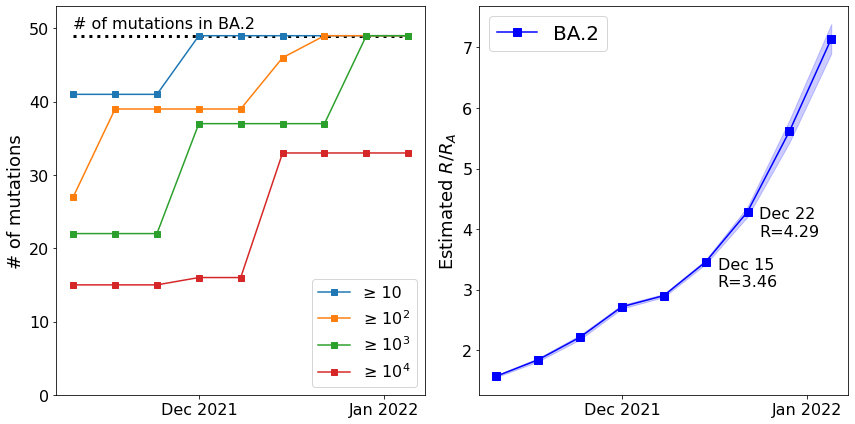

In [108]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))

dates = date_range(len(fits))
numdates = mdates.date2num(dates)
for date in dates:
    print(date)

ax0.set_ylabel("# of mutations", fontsize=18)
ax0.plot(dates, 49 * np.ones(len(dates)), 
         color='k', ls='dotted', lw=3)
ax0.text(numdates[0], 50, "# of mutations in BA.2", fontsize=16)
ax0.plot(numdates, cs10, label="≥ 10", marker='s', markersize=6)
ax0.plot(numdates, cs100, label="≥ $10^2$", marker='s', markersize=6)
ax0.plot(numdates, cs1000, label="≥ $10^3$", marker='s', markersize=6)
ax0.plot(numdates, cs10000, label="≥ $10^4$", marker='s', markersize=6)
ax0.tick_params(axis='both', which='major', labelsize=16)
ax0.set_ylim(0, 53)

ax0.xaxis.set_major_locator(mdates.MonthLocator())
ax0.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax0.legend(fontsize=16)

ax1.set_ylabel("Estimated $R$/$R_A$", fontsize=18)
ax1.plot(numdates, meanR, label="BA.2", color='blue', marker='s', markersize=8)
ax1.fill_between(numdates, Rminus, Rplus, color='blue', alpha=0.2)
ax1.tick_params(axis='both', which='major', labelsize=16)

for shift in [-3, -4]:
    text = dates[shift].strftime("%b %d") + '\nR={:.2f}'.format(meanR[shift])
    ax1.text(numdates[shift]+2, meanR[shift]-0.4, text, fontsize=16)

ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax1.legend(fontsize=20)

plt.tight_layout()
plt.savefig('omicron_backtesting.png')

In [117]:
ba2_counts = weekly_clades[:, :, ba2][:, :, 0].sum(-1)

In [123]:
ba2_counts.cumsum(-1)

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00, 2.6000e+01, 2.3900e+02,
        1.0960e+03, 1.3930e+03])

In [121]:
START_DATE="2019-12-01"
start = datetime.datetime.strptime(START_DATE, "%Y-%m-%d")
fortnight = datetime.timedelta(days=14)
np.array([start + fortnight * t for t in range(56)])[-6:]

array([datetime.datetime(2021, 10, 31, 0, 0),
       datetime.datetime(2021, 11, 14, 0, 0),
       datetime.datetime(2021, 11, 28, 0, 0),
       datetime.datetime(2021, 12, 12, 0, 0),
       datetime.datetime(2021, 12, 26, 0, 0),
       datetime.datetime(2022, 1, 9, 0, 0)], dtype=object)